<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2> A1_Regression_Analysis</h2>
<h4>DAT-5303 | Machine Learning</h4>
Jessica Lozano Schmitt <br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<h2>Purpose of this Script</h2><br>
Regression Model Development

In this assignment, you are tasked with using the information in our course case to build a predictive model on a continuous response variable (Y-variable). This assignment encompasses feature engineering, model preparation, variable selection, and model development.


Note to the professor: I am aware that the data is messy and out of order. I did  my best to keep it organised but then I got confused and it got messy. In addition to that I just wanted to remind you that I do have dyslexia so any spelling mistakes I've made are because of that! 



<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [7]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf # regression modeling


# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


In [8]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = "./__datasets/birthweight_low.xlsx"

# reading the file into Python
weight = pd.read_excel(io    = file,
                       header = 0,
                       sheet_name = 0)

# printing the first 15 rows of the dataset
weight.head(n=15)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [9]:
#finding more info from the data set
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
mage      196 non-null int64
meduc     193 non-null float64
monpre    196 non-null int64
npvis     193 non-null float64
fage      196 non-null int64
feduc     189 non-null float64
omaps     196 non-null int64
fmaps     196 non-null int64
cigs      196 non-null int64
drink     196 non-null int64
male      196 non-null int64
mwhte     196 non-null int64
mblck     196 non-null int64
moth      196 non-null int64
fwhte     196 non-null int64
fblck     196 non-null int64
foth      196 non-null int64
bwght     196 non-null int64
dtypes: float64(3), int64(15)
memory usage: 27.6 KB


In [11]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {weight.shape[0]}
Features:     {weight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [66]:
#looping to print the column names 
for column in weight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
log_bwght
log_mage
log_meduc
m_meduc
m_npvis
m_feduc
m_log_meduc
log_fage


In [71]:
# looking at output for columns
weight.columns


Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'log_bwght', 'log_mage', 'log_meduc', 'm_meduc', 'm_npvis', 'm_feduc', 'm_log_meduc', 'log_fage'], dtype='object')

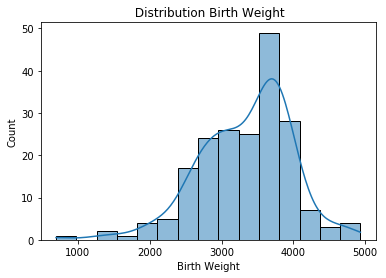

In [68]:
# developing a histogram using HISTPLOT
sns.histplot(data   = weight,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = " Distribution Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [65]:
 #formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {weight.shape[0]}
Features:     {weight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     26



In [38]:
#the #analysing the skewness for Birth Weight

weight['bwght'].skew() 

-0.6598318394004195

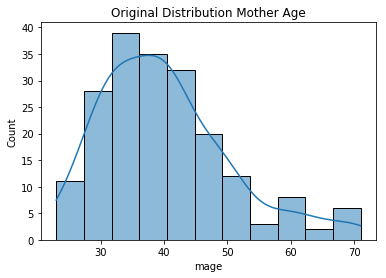

In [39]:
# developing a histogram using HISTPLOT
sns.histplot(data   = weight,
             x      = 'mage',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution Mother Age")
plt.xlabel(xlabel = "mage") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [36]:
#analysing the skewness for mother age
weight['mage'].skew() 

0.9221934382115137

In [73]:
#data discription 

print(""" 

CONTINUOUS: bwght (Y-variable) mage aka Mothers Age, 
fage aka Fathers Age,

INTERVAL/COUNT
--------------
meduc, monpre, npvis, feduc, omaps, fmaps, male, mwhte,mblck,moth,fwhte,fblck, foth,cigs, drink



""")

 

CONTINUOUS: bwght (Y-variable) mage aka Mothers Age, 
fage aka Fathers Age,

INTERVAL/COUNT
--------------
meduc, monpre, npvis, feduc, omaps, fmaps, male, mwhte,mblck,moth,fwhte,fblck, foth,cigs, drink






In [74]:
#looking for Null values
weight.isnull().sum(axis = 0)

mage           0
meduc          0
monpre         0
npvis          0
fage           0
feduc          0
omaps          0
fmaps          0
cigs           0
drink          0
male           0
mwhte          0
mblck          0
moth           0
fwhte          0
fblck          0
foth           0
bwght          0
log_bwght      0
log_mage       0
log_meduc      0
m_meduc        0
m_npvis        0
m_feduc        0
m_log_meduc    0
log_fage       0
dtype: int64

In [75]:
feduc_median = weight['feduc'].median()
npvis_median = weight['npvis'].median()
meduc_mean = weight['meduc'].median()

# filling the missing values 
weight['feduc'] = weight['feduc'].fillna(feduc_median)
weight ['npvis']  = weight['npvis'].fillna(feduc_median)
weight ['meduc'] = weight['meduc'].fillna(feduc_median)

#printing to check forr missing values 
print(weight.isnull().sum(axis = 0))


mage           0
meduc          0
monpre         0
npvis          0
fage           0
feduc          0
omaps          0
fmaps          0
cigs           0
drink          0
male           0
mwhte          0
mblck          0
moth           0
fwhte          0
fblck          0
foth           0
bwght          0
log_bwght      0
log_mage       0
log_meduc      0
m_meduc        0
m_npvis        0
m_feduc        0
m_log_meduc    0
log_fage       0
dtype: int64


In [76]:
# descriptive statistics for numeric data
weight.describe(include = 'number').round(2)

# alternative code
# housing.describe(include = [int, float]).round(2

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_mage,log_meduc,m_meduc,m_npvis,m_feduc,m_log_meduc,log_fage
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.70,2.34,11.42,39.29,13.35,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,8.09,3.66,2.48,0.02,0.02,0.04,0.02,3.65
std,10.25,2.66,1.36,4.47,8.98,3.65,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70,0.23,0.24,1.18,0.12,0.12,0.19,0.12,0.22
min,23.00,0.00,1.00,0.00,23.00,0.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00,6.55,3.14,-6.91,0.00,0.00,0.00,0.00,3.14
25%,33.00,12.00,2.00,9.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,7.98,3.50,2.48,0.00,0.00,0.00,0.00,3.55
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,8.15,3.66,2.64,0.00,0.00,0.00,0.00,3.64
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,8.23,3.83,2.77,0.00,0.00,0.00,0.00,3.76
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,8.50,4.26,2.83,1.00,1.00,1.00,1.00,4.29


In [135]:
# building a base model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                             meduc +
                                             fage +
                                             fmaps +
                                             cigs +
                                             drink +
                                             male +
                                             mwhte +
                                             fwhte +
                                             fblck """,
                                             
                                data = weight)


# telling Python to FIT the data to the blueprint
results = lm_best.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     47.55
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           6.99e-46
Time:                        23:58:00   Log-Likelihood:                -1421.4
No. Observations:                 196   AIC:                             2865.
Df Residuals:                     185   BIC:                             2901.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3908.8385    458.273      8.530      0.0

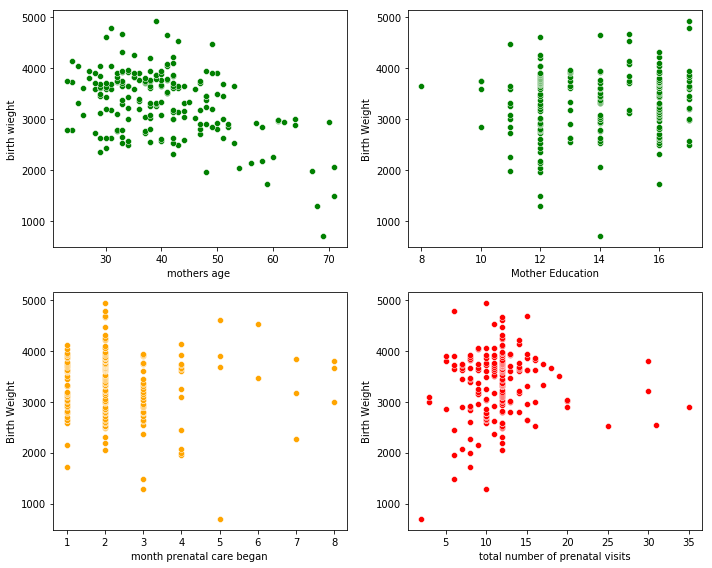

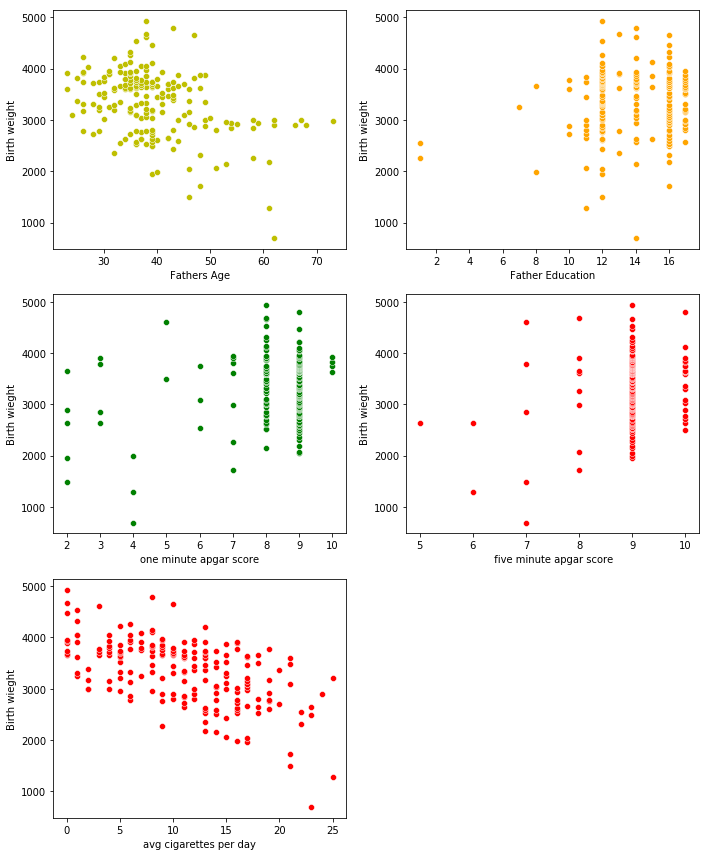

In [136]:
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = weight['mage'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'mothers age ')
plt.ylabel(ylabel = 'birth wieght')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = weight['meduc'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother Education')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = weight['monpre'],
                y = weight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'month prenatal care began ')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = weight['npvis'],
                y = weight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'total number of prenatal visits')
plt.ylabel(ylabel = 'Birth Weight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/weight Scatterplots 1 of 2.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = weight['fage'],
                y = weight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Fathers Age')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = weight['feduc'],
                y = weight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father Education')
plt.ylabel(ylabel = 'Birth wieght')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = weight['omaps'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'one minute apgar score')
plt.ylabel(ylabel = 'Birth wieght')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = weight['fmaps'],
                y = weight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = ' five minute apgar score')
plt.ylabel(ylabel = 'Birth wieght')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = weight['cigs'],
                y = weight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'avg cigarettes per day')
plt.ylabel(ylabel = 'Birth wieght')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/weight Scatterplots 2 of 2.png')
plt.show()

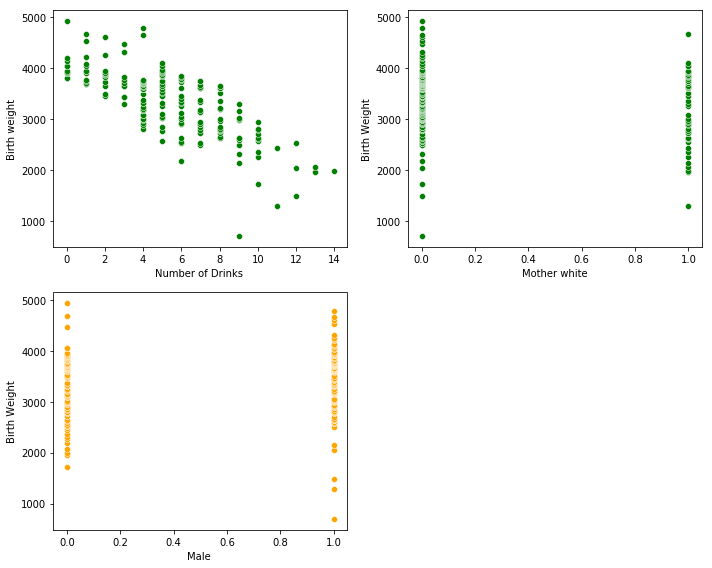

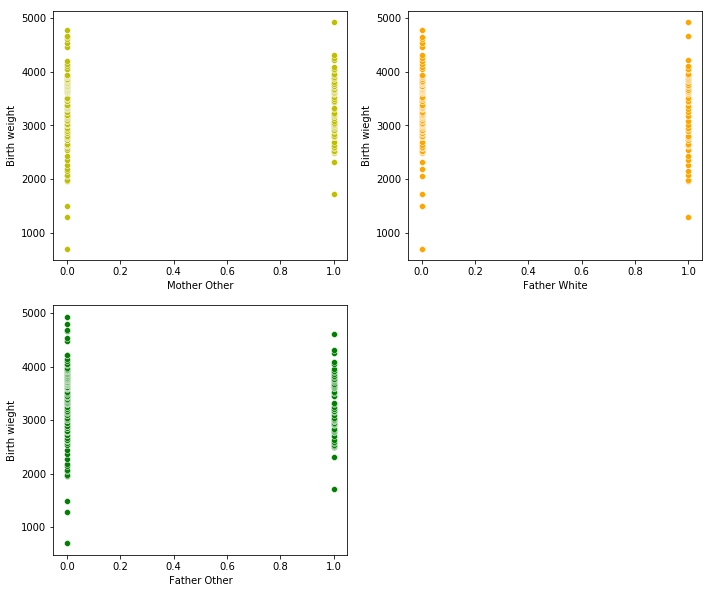

In [137]:
# Visual EDA (Scatterplots)
########################

# No need

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = weight['drink'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Number of Drinks ')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = weight['mwhte'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother white')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = weight['male'],
                y = weight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Male ')
plt.ylabel(ylabel = 'Birth Weight')


########################


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/weight Scatterplots 1 of 2.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = weight['moth'],
                y = weight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother Other')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = weight['fwhte'],
                y = weight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father White')
plt.ylabel(ylabel = 'Birth wieght')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = weight['foth'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father Other')
plt.ylabel(ylabel = 'Birth wieght')


########################


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/weight Scatterplots 2 of 2.png')
plt.show()

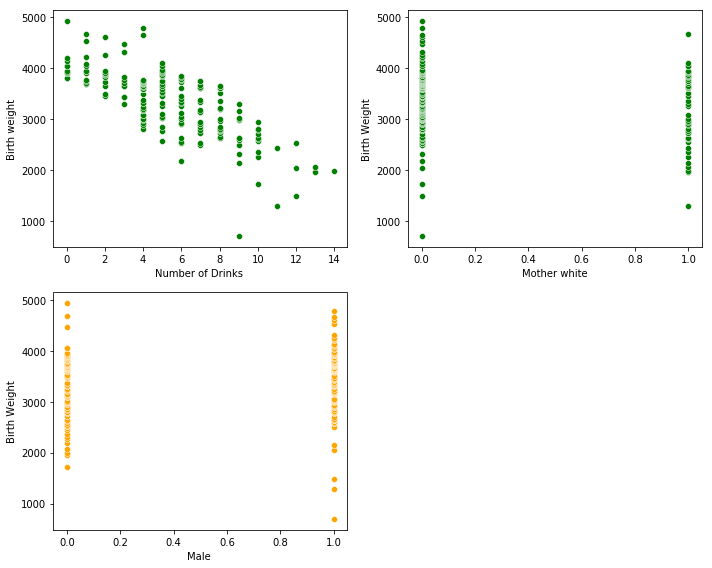

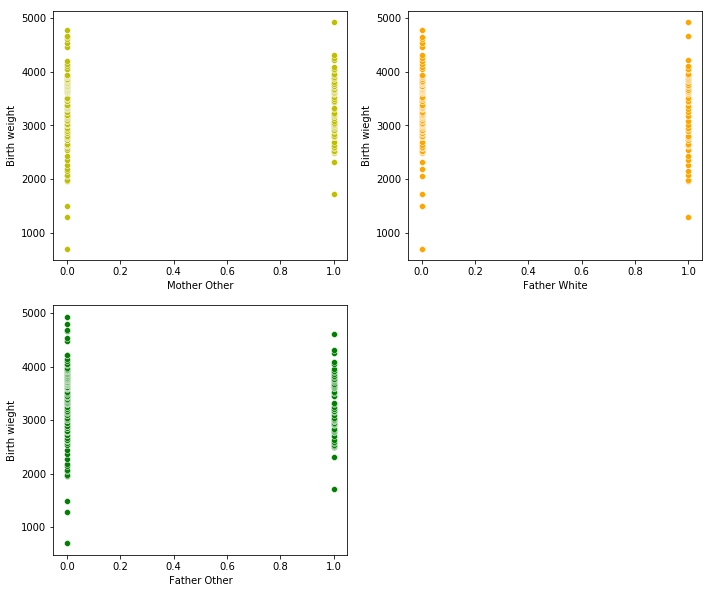

In [53]:
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = weight['drink'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Number of Drinks ')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = weight['mwhte'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother white')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = weight['male'],
                y = weight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Male ')
plt.ylabel(ylabel = 'Birth Weight')


########################


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/weight Scatterplots 1 of 2.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = weight['moth'],
                y = weight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother Other')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = weight['fwhte'],
                y = weight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father White')
plt.ylabel(ylabel = 'Birth wieght')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = weight['foth'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father Other')
plt.ylabel(ylabel = 'Birth wieght')


########################


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/weight Scatterplots 2 of 2.png')
plt.show()

In [77]:
#Defining copy_weight
copy_weight = pd.DataFrame.copy(weight)

In [40]:
#defing the x varibles
x_variables= ['mage','meduc','monpre', 'npvis','fage','feduc' ,'omaps', 'fmaps','cigs' ,'drink', 
              'male' , 'mwhte' ,'mblck','moth',
                                    'fwhte' ,
                                    'fblck' ,
                                    'foth']

In [78]:
# list of continuous features (including Birthweight)
correlation_data = ["mage","meduc","monpre","npvis","fage","feduc","omaps","fmaps","cigs","drink",
                  "male","mwhte","mblck","moth","fwhte","fblck","foth","bwght"]
    
# correlation matrix based on continuous features
weight_corr = copy_weight[correlation_data].corr(method = 'pearson')


# filtering the results to only show correlations with bwght
weight_corr.loc[ : , correlation_data].round(decimals = 2).sort_values(ascending = False,
                                                                     by ="bwght")

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
bwght,-0.46,0.16,-0.05,0.04,-0.40,0.10,0.25,0.25,-0.57,-0.74,0.11,-0.11,0.13,-0.02,-0.04,0.12,-0.08,1.00
omaps,-0.21,0.29,-0.17,0.08,-0.16,0.35,1.00,0.64,-0.15,-0.18,-0.01,-0.18,-0.02,0.19,-0.12,-0.01,0.13,0.25
fmaps,-0.24,0.19,-0.08,0.08,-0.20,0.20,0.64,1.00,-0.09,-0.16,-0.03,-0.02,-0.07,0.09,0.01,-0.04,0.04,0.25
meduc,-0.15,1.00,-0.18,0.24,-0.10,0.53,0.29,0.19,0.05,-0.12,-0.10,-0.17,-0.14,0.30,-0.08,-0.18,0.27,0.16
mblck,-0.02,-0.14,0.13,-0.08,-0.06,-0.22,-0.02,-0.07,-0.20,-0.11,0.12,-0.48,1.00,-0.57,-0.46,0.89,-0.44,0.13
fblck,0.04,-0.18,0.03,-0.06,-0.03,-0.05,-0.01,-0.04,-0.19,-0.10,0.11,-0.44,0.89,-0.50,-0.53,1.00,-0.48,0.12
male,-0.05,-0.10,-0.08,-0.03,-0.09,0.01,-0.01,-0.03,-0.12,-0.09,1.00,-0.10,0.12,-0.03,-0.03,0.11,-0.08,0.11
feduc,-0.11,0.53,-0.47,0.11,-0.00,1.00,0.35,0.20,0.06,-0.04,0.01,-0.21,-0.22,0.42,-0.19,-0.05,0.25,0.10
npvis,-0.05,0.24,-0.30,1.00,-0.04,0.11,0.08,0.08,0.01,-0.05,-0.03,0.06,-0.08,0.03,0.06,-0.06,0.00,0.04
moth,0.02,0.30,-0.21,0.03,0.03,0.42,0.19,0.09,0.17,-0.04,-0.03,-0.44,-0.57,1.00,-0.31,-0.50,0.83,-0.02


In [79]:
# Applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = weight.loc[ : , x_variables]


# Preparing the target variable
weight_target = weight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            weight_data,     # x-variables
            weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


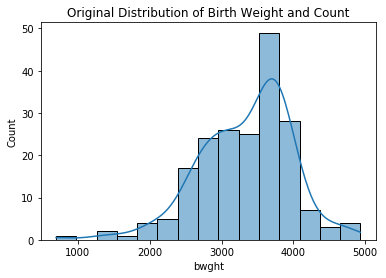

In [80]:
# developing a histogram using HISTPLOT
sns.histplot(data   = weight,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth Weight and Count")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [43]:
# log transforming weight to the dataset
weight['log_bwght'] = np.log(weight['bwght'])
weight['log_mage'] = np.log(weight['mage'])
weight['log_meduc'] = np.log(weight['meduc'] + 0.001)

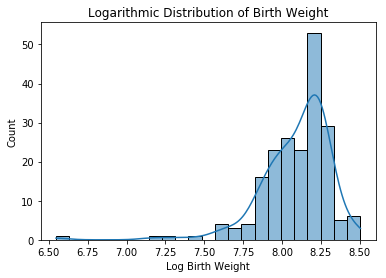

In [81]:
# developing a histogram using HISTPLOT

sns.histplot(data   = weight,
             x      = 'log_bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Log Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

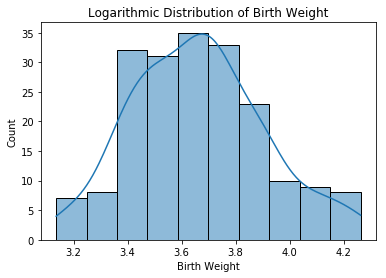

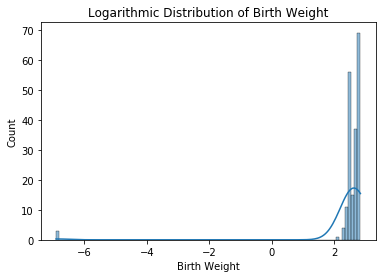

In [82]:
# histogram for Lot_Area (skewed positive)
sns.histplot(data   = weight,
             x      = 'log_mage',
             kde    = True)

plt.title(label   = "Logarithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# rendering the plot
plt.show()


# histogram for Mas_Vnr_Area (zero inflated and skewed positive)
sns.histplot(data   = weight,
             x      = 'log_meduc',
             kde    = True)

plt.title(label   = "Logarithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# rendering the plot
plt.show()

In [83]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_mage ~ log_meduc""",
                        data = weight)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               log_mage   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.889
Date:                Wed, 24 Nov 2021   Prob (F-statistic):             0.0908
Time:                        21:27:58   Log-Likelihood:                0.13754
No. Observations:                 196   AIC:                             3.725
Df Residuals:                     194   BIC:                             10.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7243      0.040     92.265      0.0

In [84]:
# looping to detect features with missing values
for col in weight:

    # creating columns with 1s if missing and 0 if not
    if weight[col].isnull().astype(int).sum() > 0:
        weight['m_'+col] = weight[col].isnull().astype(int)




In [85]:
# summing the missing value flags to check the results of the loop above
weight[    ['m_meduc', 'm_feduc',
           'm_log_meduc', 'm_npvis']    ].sum(axis = 0)

m_meduc        3
m_feduc        7
m_log_meduc    3
m_npvis        3
dtype: int64

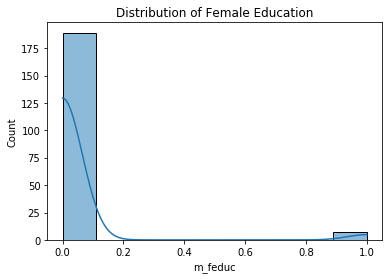

In [50]:
# creating a dropped dataset to visualize 'Mas Vnr Area'
df_dropped = weight.dropna()


# displaying the plot for 'Mas Vnr Area'
sns.histplot(x = 'm_feduc',
            data = df_dropped,
            kde = True)


# title and labels
plt.title('Distribution of Female Education')


# displaying the plot
plt.show()

In [89]:
#Understanding Skewness
skew_mage = weight['mage'].skew()
skew_fage = weight['fage'].skew()
skew_cigs = weight['cigs'].skew()
skew_drink = weight['drink'].skew()
print(f""" 
Skewness mage = {skew_mage}
Skewness fage = {skew_fage}
Skewness cigs = {skew_cigs}
Skewness drink = {skew_drink}""")

 
Skewness mage = 0.9221934382115137
Skewness fage = 1.1204247978460333
Skewness cigs = 0.03188089214189387
Skewness drink = 0.23487583956069338


In [90]:
# log for mother age, father age
weight['log_mage'] = np.log(weight['mage'])
print(weight['log_mage'].skew())
weight['log_fage'] = np.log(weight['fage'])
print(weight['log_fage'].skew())

0.2902963460704767
0.35121456049793637


In [91]:
weight.isnull().any().any()

False

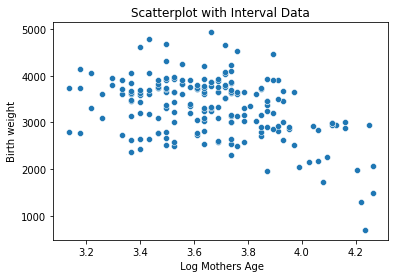

In [92]:
# developing a scatterplot
sns.scatterplot(x    = 'log_mage',
                y    = 'bwght',
                data = weight)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = ' Log Mothers Age')
plt.ylabel(ylabel = 'Birth weight')


# displaying the plot
plt.show()

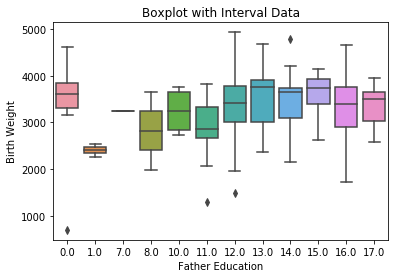

In [93]:
# developing a boxplot
sns.boxplot(x    = 'feduc',
            y    = 'bwght',
            data = weight)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Father Education')
plt.ylabel(ylabel = 'Birth Weight')


# displaying the plot
plt.show()

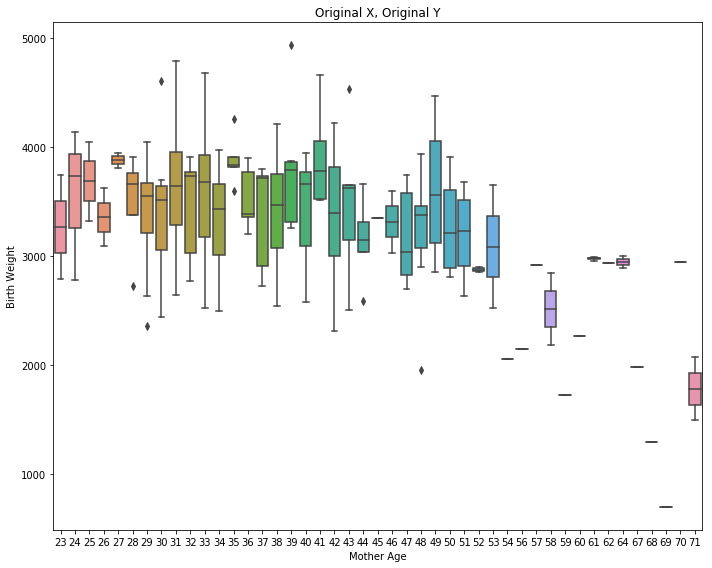

In [26]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


## Plot 1: Original X, Original Y ##
sns.boxplot(x     = 'mage',
            y     = 'bwght',
            data  = weight)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'Mother Age')
plt.ylabel(ylabel = 'Birth Weight')


## displaying the visual ##
plt.tight_layout()
plt.show()



In [95]:
# Model Example 1 ##

# building a fit model

# blueprinting a model type
lm_full = smf.ols(formula = """ bwght ~ mage +
                                    meduc +
                                    monpre +
                                    npvis +
                                    fage +
                                    feduc +
                                    omaps +
                                    fmaps +
                                    cigs +
                                    drink +
                                    male +
                                    mwhte +
                                    mblck +
                                    moth +
                                    fwhte +
                                    fblck +
                                    foth 
                                    """,
                                data = weight)



#Vaibles cigs & drinks
#log father father eductaion 
#cigs * drinks 





# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     31.10
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.56e-42
Time:                        21:34:44   Log-Likelihood:                -1420.8
No. Observations:                 196   AIC:                             2874.
Df Residuals:                     180   BIC:                             2926.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2438.2882    275.906      8.837      0.000    1893.862    2982.714
mage         -10.2698      3.299     -3.113      0.002     -16.779      -3.760
meduc         17.5046     12.955      1.351      0.178      -8.059      43.068
monpre        -7.0469     23.092     -0.305      0.761     -52.613      38.519
npvis         -3.8422      6.264     -0.613      0.540     -16.202       8.517
fage          -4.8934      3.576     -1.368      0.173     -11.949       2.163
feduc          3.6711     11.239      0.327      0.744     -18.507      25.849
omaps         -5.2329     22.658     -0.231      0.818     -49.941      39.476
fmaps         77.1584     52.111      1.481      0.140     -25.669     179.986
cigs         -36.1383      4.663     -7.750      0.000     -45.340     -26.937
drink       -114.3116      9.819    -11.642      0.000    -133.686     -94.937
male          28.6548     52.820      0.543      0.588     -75.571     132.881
mwhte        869.1921    122.879      7.074      0.000     626.724    1111.660
mblck        776.1823    122.191      6.352      0.000     535.071    1017.293
moth         792.9138    124.381      6.375      0.000     547.482    1038.346
fwhte        759.5402    111.839      6.791      0.000     538.856     980.225
fblck        859.0220    136.325      6.301      0.000     590.022    1128.022
foth         819.7260    116.674      7.026      0.000     589.501    1049.951
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.634
Skew:                           0.090   Prob(JB):                        0.728
Kurtosis:                       3.212   Cond. No.                     5.53e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
# preparing explanatory variable data
weight_data   = weight.drop(['omaps',
                               'fmaps',
                               'bwght',
                               'log_bwght'],
                                axis = 1)


# preparing response variable data
weight_target = weight.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            weight_data,
            weight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (147, 22)
y-side: 147


Testing Data
------------
X-side: (49, 22)
y-side: 49



In [103]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = weight.loc[ : , x_variables]


# Preparing the target variable
weight_target = weight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            weight_data,     # x-variables
            weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [109]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = weight.loc[ : , x_variables]


# preparing response variable
birthweight_target = weight.loc[ : , 'bwght']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            weight_data,     # x-variables
            weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
# for OLS look at p values built for limited sample sizes...

x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [121]:
#Removing explanatory variables for better p values

# blueprinting a model type
lm_full = smf.ols(formula = """ bwght ~ mage +
                                        cigs +
                                        drink +
                                        mwhte +
                                        mblck +
                                        moth +
                                        fwhte +
                                        fblck +
                                        foth""",
                                        data = weight)
# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     64.57
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.12e-46
Time:                        21:41:47   Log-Likelihood:                -1426.0
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     188   BIC:                             2894.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2970.7332     66.826     44.455      0.000    2838.908    3102.559
mage         -14.4535      2.688     -5.376      0.000     -19.757      -9.150
cigs         -36.4272      4.610     -7.901      0.000     -45.522     -27.333
drink       -117.3954      9.729    -12.066      0.000    -136.588     -98.203
mwhte       1026.4093     80.694     12.720      0.000     867.227    1185.591
mblck        926.5377     77.920     11.891      0.000     772.828    1080.248
moth        1017.7862     69.182     14.712      0.000     881.313    1154.259
fwhte        937.0330     66.384     14.115      0.000     806.080    1067.986
fblck       1054.0221     86.440     12.194      0.000     883.505    1224.540
foth         979.6780     73.415     13.344      0.000     834.854    1124.502
==============================================================================
Omnibus:                        5.189   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                6.684
Skew:                          -0.139   Prob(JB):                       0.0354
Kurtosis:                       3.861   Cond. No.                     8.12e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
import sklearn.linear_model # linear models
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7351
Lasso Testing Score  : 0.6357
Lasso Train-Test Gap : 0.0994


In [127]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7459
Testing Score : 0.6607
ARD Train-Test Gap : 0.0852


In [122]:
# declaring set of x-variables
x_variables = ['mage','cigs','drink','mwhte','mblck',
               'moth','fwhte','fblck','foth']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +


In [123]:
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula = """bwght ~  fage +
                                        cigs +
                                        drink +
                                        mwhte +
                                        mblck +
                                        moth +
                                        fwhte +
                                        fblck +
                                        foth""",
                                        data = birthweight_train)
# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     41.66
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.66e-31
Time:                        21:41:57   Log-Likelihood:                -1081.5
No. Observations:                 147   AIC:                             2179.
Df Residuals:                     139   BIC:                             2203.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2975.5000     89.463     33.260      0.0

In [124]:
# INSTANTIATING a model object

from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7378
OLS Testing Score  : 0.5937
OLS Train-Test Gap : 0.1441


In [125]:
#Instantiating a model object
lr = LinearRegression()

#fitting to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)
#predicting on new data
lr_pred = lr_fit.predict(x_test_OLS)

#Scoring the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4)) # using R squared
print('OLS Testing Score :', lr.score(x_test_OLS, y_test_OLS).round(4)) #using R squared

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)
#displaying and saving the gap between training and testing
print('OLS Train-Test Gap :' , abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7378
OLS Testing Score : 0.5937
OLS Train-Test Gap : 0.1441


In [129]:
print("""I am very lost and having a panic attack with 
10 to mins to spare, I've accepted that I'm going to 
fail this assignment. 
I will book a one on one with you 
      """)

I am very lost and having a panic attack with 
10 to mins to spare, I've accepted that I'm going to 
fail this assignment. 
I will book a one on one with you 
      
